In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [13]:
dataset_name = "rock_paper_scissors"
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True)

dataset_train = dataset['train']
dataset_test = dataset['test']

In [14]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

In [15]:
dataset_train = dataset_train.map(preprocess).batch(32).shuffle(1000)
dataset_test = dataset_test.map(preprocess).batch(32)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(28, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(info.features['label'].num_classes, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(dataset_train, epochs=5, validation_data=dataset_test)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(dataset_test)
print(f'Precision en test: {test_acc:.4f}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7581 - loss: 0.6052
Precision en test: 0.7634


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


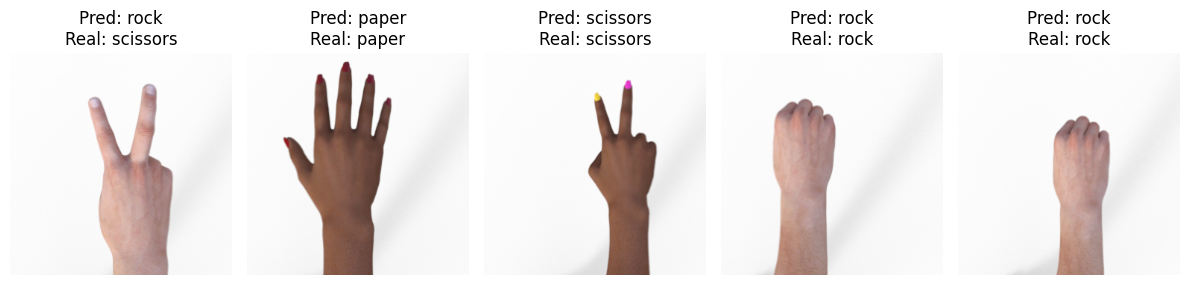

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener un lote de imágenes y etiquetas desde el dataset de prueba
for images, labels in dataset_test.take(1):
    predictions = model.predict(images)
    images_np = images.numpy()
    labels_np = labels.numpy()
    predictions_np = np.argmax(predictions, axis=1)

# Mostrar algunas imágenes con sus predicciones y etiquetas reales
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_np[i])
    label_names = info.features['label'].names
    plt.title(f"Pred: {label_names[predictions_np[i]]}\nReal: {label_names[labels_np[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
